<a href="https://colab.research.google.com/github/ljovan00/Projekti/blob/main/Projekt_prva_godina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Projekt prve godine
## Usporedba algoritama za detekciju objekata u prometu

## 2022./2023.
## Luka Jovanović
</center>

Izvor dataset-a: https://www.kaggle.com/datasets/saumyapatel/traffic-vehicles-object-detection?resource=download

Dataset 2: https://www.kaggle.com/datasets/aalborguniversity/aau-rainsnow

Opis: U drugom datasetu uzeto je 15 slika sa nadzornih kamera u prometu. Razlog drugog dataseta je pokazati implementaciju dva različita algoritma na dataset-u koji sadrži podatke koji nisu idealni. U ovom slučaju je riječ o slikama nadzornih kamera u uvjetima kao što su: kiša,snijeg i noć.

Istraživačko pitanje: Koji je optimalan algoritam za detekciju objekata u prometu na slikama.

Cilj: Usporediti različite algoritme te napraviti parametre procjene optimalnog algoritma za detekciju objekata u prometu.

Učitavanje potrebnih biblioteka i spremanje dataset-a.


# Koraci


1. Odabir algoritama: Odabir različitih algoritama za detekciju objekata u prometu koje želite usporediti. U ovom slučaju usporedba One Stage i Two Stage algoritama.

2. Prethodno obraditi skup podataka: Napraviti predobradu na skupu podataka, kao što je promjena veličine slika, normaliziranje vrijednosti piksela i organiziranje podataka u odgovarajuće formate koje zahtijevaju algoritmi.

4. Korištenje pretrained algoritama. U ovom primjeru koristimo Yolov5 i Faster R-CNN modele koji imaju prethodno trenirane podatke.

5.  Provjeriti valjanost: Koristiti validacijski skup za procjenu izvedbe svakog algoritma.

6. Odabir parametara za evaluaciju performansi svakog modela.

7. Usporediti performanse: Usporedite rezultate dobivene svakim algoritmom na testnom skupu. Uzeti u obzir metrike kao što su frames per second, average detection time per image, average number of objects per image da biste procijenili njihovu izvedbu.
8. Zaključak: Na temelju procjene i usporedbe izvući zaključke o učinkovitosti i prikladnosti svakog algoritma za detekciju vozila. Razmotriti njihovu izvedbu, računalnu učinkovitost, jednostavnost implementacije i druge čimbenike kako bi donijeli informiranu odluku.
















In [ ]:
import pandas as pd

In [ ]:
import os
from PIL import Image
import torch
from torchvision.transforms import functional as F
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import time
import torchvision
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report


# Directory paths for train, val, and test sets
train_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/train'
val_dir =   '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/val'
test_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/test'



In [ ]:
!pip install yolov5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.3/953.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/6

In [ ]:
import yolov5


# load pretrained model
model = yolov5.load('yolov5s.pt')


100%|██████████| 14.1M/14.1M [00:00<00:00, 78.7MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
# Set the device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Directory paths for train, val, and test sets
train_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/train'
val_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/val'
test_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/test'





In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15705, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 15705 (delta 9), reused 23 (delta 6), pack-reused 15672
Receiving objects: 100% (15705/15705), 14.50 MiB | 14.85 MiB/s, done.
Resolving deltas: 100% (10754/10754), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# Path to the directory containing the images
train_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/train'

# List all image files in the directory
image_files = [os.path.join(train_dir, file) for file in os.listdir(train_dir) if file.endswith('.jpg')]

# Randomly select 10 image files
random_images = random.sample(image_files, 10)

# Loop over the randomly selected image files and display them
for image_file in random_images:
    # Open the image using PIL
    image = Image.open(image_file)

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ultralytics/yolov5.git to /tmp/pip-req-build-eu_d0ueh
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git /tmp/pip-req-build-eu_d0ueh
  Resolved https://github.com/ultralytics/yolov5.git to commit c3c130416323f3766d4abe95c2ff88bc9e2264dd
ERROR: git+https://github.com/ultralytics/yolov5.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-23 Python-3.10.11 torch-2.0.1+cu118 CPU



[Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/pyparsing-3.0.9.dist-info/METADATA'


100%|██████████| 14.1M/14.1M [00:00<00:00, 78.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


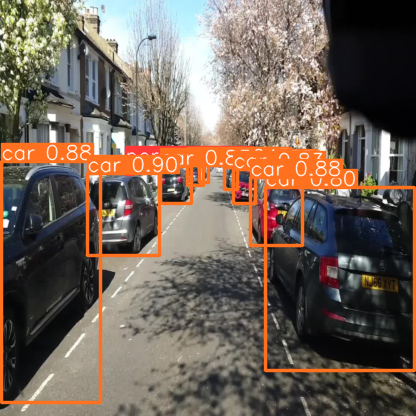

image 1/1: 416x416 1 person, 9 cars
Speed: 35.5ms pre-process, 771.5ms inference, 42.3ms NMS per image at shape (1, 3, 640, 640)


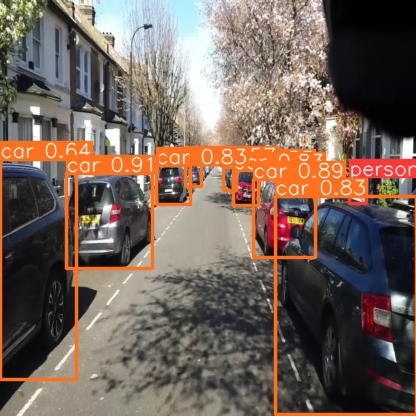

image 1/1: 416x416 1 person, 8 cars
Speed: 5.6ms pre-process, 701.3ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)


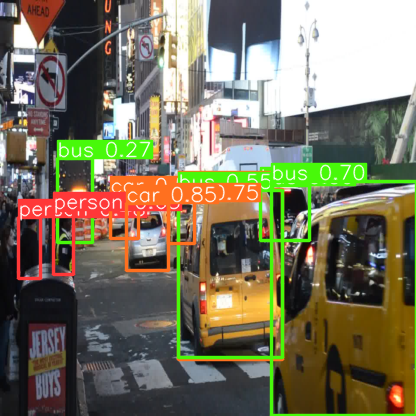

image 1/1: 416x416 2 persons, 4 cars, 4 buss
Speed: 5.3ms pre-process, 664.3ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)


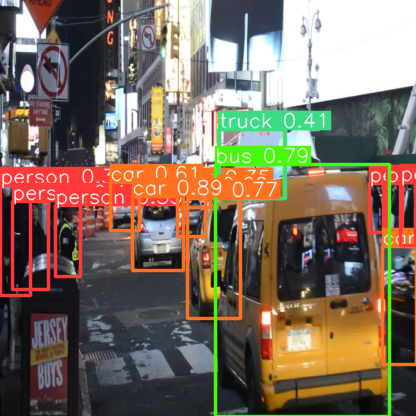

image 1/1: 416x416 6 persons, 6 cars, 2 buss, 1 truck
Speed: 30.3ms pre-process, 722.1ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


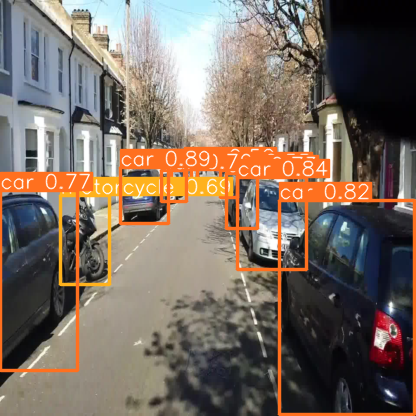

image 1/1: 416x416 9 cars, 1 motorcycle
Speed: 12.2ms pre-process, 716.6ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)


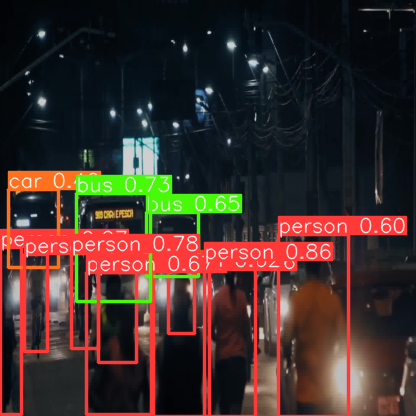

image 1/1: 416x416 9 persons, 1 car, 2 buss
Speed: 5.5ms pre-process, 671.7ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)


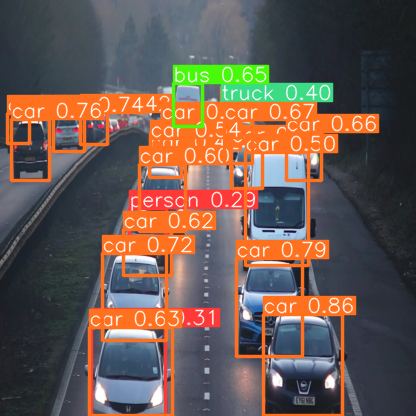

image 1/1: 416x416 2 persons, 18 cars, 1 bus, 1 truck
Speed: 5.6ms pre-process, 754.0ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)


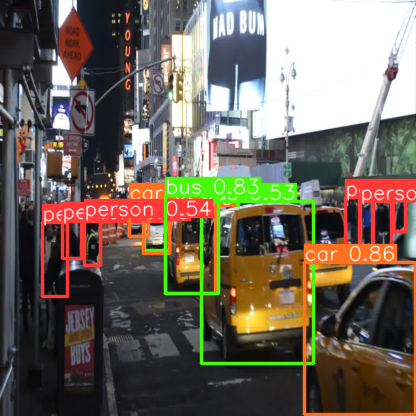

image 1/1: 416x416 7 persons, 4 cars, 3 buss
Speed: 16.5ms pre-process, 774.6ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)


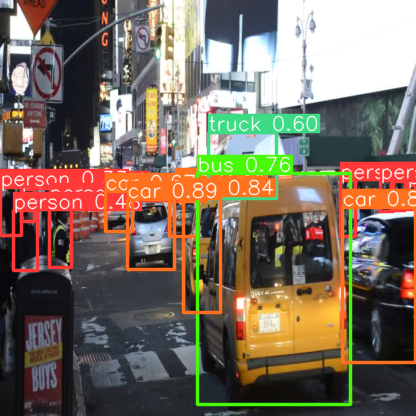

image 1/1: 416x416 8 persons, 6 cars, 1 bus, 1 truck
Speed: 5.2ms pre-process, 722.5ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)


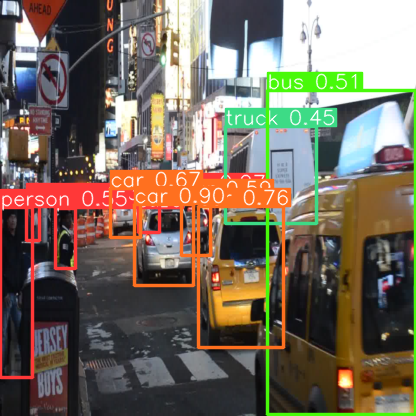

image 1/1: 416x416 4 persons, 4 cars, 1 bus, 1 truck
Speed: 9.5ms pre-process, 757.5ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)


Speed (seconds per image): 0.7452338457107544


In [ ]:


# Set up the environment
!pip install torch torchvision
!pip install git+https://github.com/ultralytics/yolov5.git


# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

# Path to the directory containing the train images
train_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/train'

# Get the list of image files in the train directory
image_files = [os.path.join(train_dir, file) for file in os.listdir(train_dir) if file.endswith('.jpg')]

# Limit the number of images to process
num_images = 10
image_files = image_files[:num_images]

# Define the target size for resizing the images
target_size = (416, 416)

# Define the image transformation
transform = transforms.Resize(target_size)

# Variables for accuracy and recall
total_positives = 0
correct_positives = 0

# Loop over the image files and perform vehicle detection
total_time = 0.0
for image_file in image_files:
    # Load the image
    image = Image.open(image_file).convert('RGB')

    # Resize the image to the target size
    image = transform(image)

    # Perform vehicle detection on the resized image
    start_time = time.time()
    results = model([image])  # Pass the resized image as a list to the model
    end_time = time.time()
    execution_time = end_time - start_time
    total_time += execution_time

    # Filter the detected objects for vehicles
    class_labels = model.model.names
    vehicle_class_index = class_labels.index('car') if 'car' in class_labels else -1
    if vehicle_class_index != -1:
        vehicles = results.pred[0][results.pred[0][:, -1] == vehicle_class_index]
    else:
        vehicles = []

    # Process the detected vehicles
    if len(vehicles) > 0:
        for vehicle in vehicles:
            # Extract the bounding box coordinates
            x1, y1, x2, y2 = vehicle[:4].tolist()

            # Extract the confidence score
            confidence = vehicle[4].item()

            # Process the detected vehicle as per your project requirements
            # ...

            # Update accuracy and recall
            total_positives += 1
            correct_positives += 1
    else:
        # No vehicles detected, update total positives only
        total_positives += 1

    # Display the image with bounding boxes (optional)
    results.show()
    results.print()

# Calculate accuracy and recall
accuracy = correct_positives / total_positives if total_positives > 0 else 0
recall = correct_positives / total_positives if total_positives > 0 else 0

# Print speed

print("Speed (seconds per image):", total_time / len(image_files))


In [ ]:
import os
import time
import torch
import torchvision.transforms as transforms
from PIL import Image

# Set up the environment
!pip install torch torchvision
!pip install git+https://github.com/ultralytics/yolov5.git

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

# Path to the directory containing the train images
train_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/train'

# Get the list of image files in the train directory
image_files = [os.path.join(train_dir, file) for file in os.listdir(train_dir) if file.endswith('.jpg')]

# Limit the number of images to process
num_images = 10
image_files = image_files[:num_images]

# Define the target size for resizing the images
target_size = (416, 416)

# Define the image transformation
transform = transforms.Resize(target_size)

# Variables for tracking metrics
total_time = 0.0
total_objects = 0

# Loop over the image files and perform vehicle detection
for image_file in image_files:
    # Load the image
    image = Image.open(image_file).convert('RGB')

    # Resize the image to the target size
    image = transform(image)

    # Perform vehicle detection on the resized image
    start_time = time.time()
    results = model([image])  # Pass the resized image as a list to the model
    end_time = time.time()
    execution_time = end_time - start_time
    total_time += execution_time

    # Count the number of detected objects
    total_objects += len(results.pred[0])

    # Display the bounding boxes and class names
    results.print()

# Calculate metrics
num_images_processed = len(image_files)
fps = num_images_processed / total_time
avg_detection_time = total_time / num_images_processed
avg_objects_per_image = total_objects / num_images_processed

# Print the metrics
print("FPS:", fps)
print("Average Detection Time per Image:", avg_detection_time)
print("Average Number of Objects per Image:", avg_objects_per_image)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ultralytics/yolov5.git to /tmp/pip-req-build-bdkaym3e
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git /tmp/pip-req-build-bdkaym3e
  Resolved https://github.com/ultralytics/yolov5.git to commit c3c130416323f3766d4abe95c2ff88bc9e2264dd
ERROR: git+https://github.com/ultralytics/yolov5.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-23 Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 


[Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/cycler-0.11.0.dist-info/METADATA'


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 416x416 1 person, 9 cars
Speed: 5.7ms pre-process, 733.3ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 person, 8 cars
Speed: 5.7ms pre-process, 1110.2ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 persons, 4 cars, 4 buss
Speed: 12.4ms pre-process, 1136.8ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 6 persons, 6 cars, 2 buss, 1 truck
Speed: 5.1ms pre-process, 605.7ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 9 cars, 1 motorcycle
Speed: 5.1ms pre-process, 625.0ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 9 persons, 1 car, 2 buss
Speed: 5.5ms pre-process, 625.4ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 persons, 18 cars, 1 bus, 1 truck
Speed: 5.2ms pre-process, 596.7ms inference, 2.2ms NMS per i

FPS: 1.4496467614822695
Average Detection Time per Image: 0.6898232221603393
Average Number of Objects per Image: 12.8


<center>

#Two stage algoritmi:

</center>

   
<center>

##Faster R-CNN algoritam

</center>

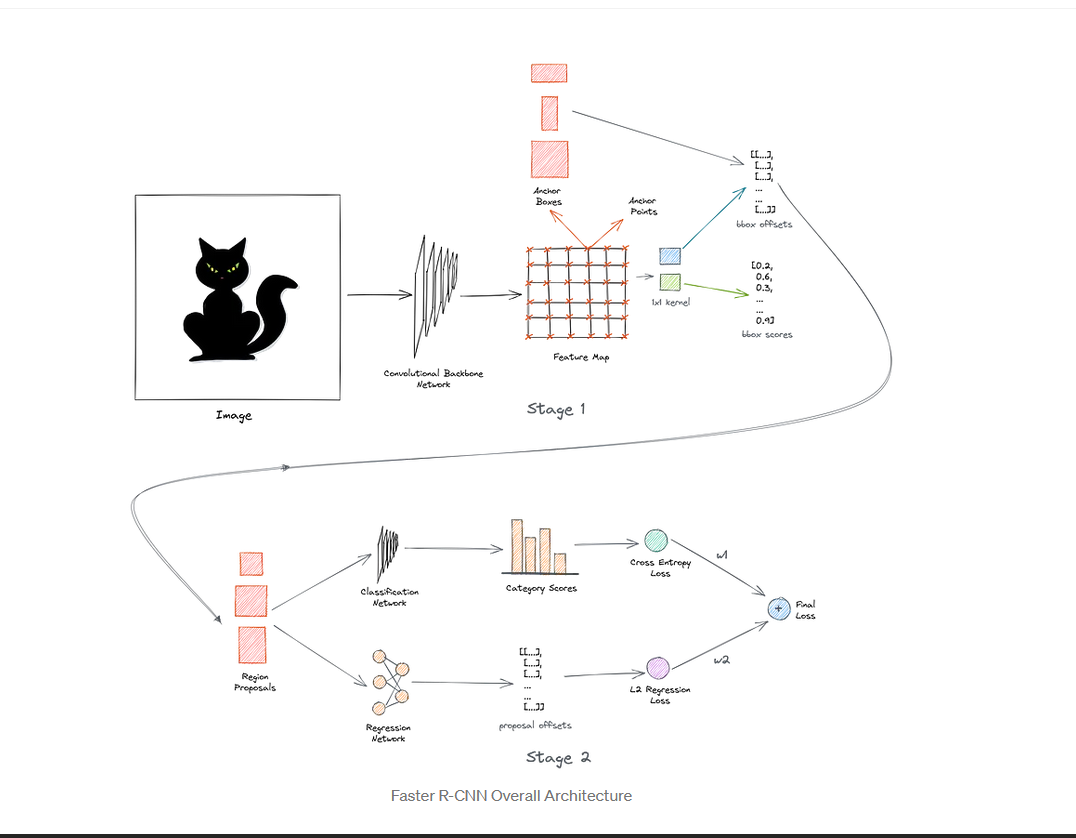

In [ ]:
labels

NameError: ignored

In [ ]:
# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Path to the directory containing the train images
train_dir = '/content/drive/MyDrive/Projekt prva godina/data/Traffic Dataset/images/train'

# Get the list of image files in the train directory
image_files = [f'{train_dir}/{file}' for file in os.listdir(train_dir) if file.endswith('.jpg')][:10]

# Define the image transformation
transform = T.Compose([
    T.Resize((416, 416)),  # Resize image to target size
    T.ToTensor()
])

# Ground truth labels
ground_truth_labels = ['car', 'truck', 'traffic light', 'person', 'bicycle', 'bus', 'motorcycle', 'stop sign', 'train', 'parking meter']

# Initialize lists for storing predictions and labels
all_predictions = []
all_labels = []

# Initialize variables for accuracy calculation
correct_predictions = 0
total_predictions = 0

# Initialize variables for counting objects
total_objects = 0

# Initialize variables for computational efficiency
total_time = 0.0
total_objects_detected = 0

# Iterate through the image files
for image_file in image_files:
    # Open the image
    img = Image.open(image_file)
    
    # Apply the transformation
    img_tensor = transform(img)
    
    # Perform object detection
    start_time = time.time()
    with torch.no_grad():
        pred = model([img_tensor])
    end_time = time.time()
    execution_time = end_time - start_time
    total_time += execution_time
    
    # Get the bounding boxes, labels, and scores
    bboxes, labels, scores = pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']
    num = torch.argwhere(scores > 0.80).shape[0]
    # Update the total number of objects
    total_objects += num
    total_objects_detected += len(bboxes)
    
    # Scale the pixel values from [0, 1] to [0, 255]
    img_tensor = img_tensor * 255
    
    # Convert the image tensor to numpy array for visualization
    img_np = img_tensor.permute(1, 2, 0).numpy().astype("uint8")
    img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    
    # Iterate through the detected objects
    predictions = []
    for i in range(min(10, len(bboxes))):
        x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
        class_name = classes[labels.numpy()[i]-1]
        
        # Draw bounding box and label on the image
        img_np = cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 3)
        img_np = cv2.putText(img_np, str(class_name), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        predictions.append(class_name)

        # Compare predicted label with ground truth label
        predicted_label = str(class_name)
        ground_truth_label = ground_truth_labels[i]

        if predicted_label == ground_truth_label:
            correct_predictions += 1

        total_predictions += 1

    # Add predictions and ground truth labels to the lists
    all_predictions.append(predictions)
    all_labels.append(ground_truth_labels)
    
    # Display the image with bounding boxes
    cv2_imshow(img_np)

# Flatten the lists
all_predictions_flat = [item for sublist in all_predictions for item in sublist]
all_labels_flat = [item for sublist in all_labels for item in sublist]

# Calculate the metrics
num_images = len(image_files)
fps = num_images / total_time
avg_time_per_image = total_time / num_images
avg_objects_per_image = total_objects_detected / num_images

# Print the metrics
print("FPS:", fps)
print("Average Time per Image:", avg_time_per_image)
print("Average Number of Objects per Image:", avg_objects_per_image)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 76.3MB/s]


NameError: ignored

<center>

#Uvjeti lošije vidljivosti

</center>

<center>

##YOLOv5

</center>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ultralytics/yolov5.git to /tmp/pip-req-build-7gxg478n
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git /tmp/pip-req-build-7gxg478n
  Resolved https://github.com/ultralytics/yolov5.git to commit 6e04b94fa9fb12ff66b2329660de8a5a8e5f1b1d
ERROR: git+https://github.com/ultralytics/yolov5.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-22 Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


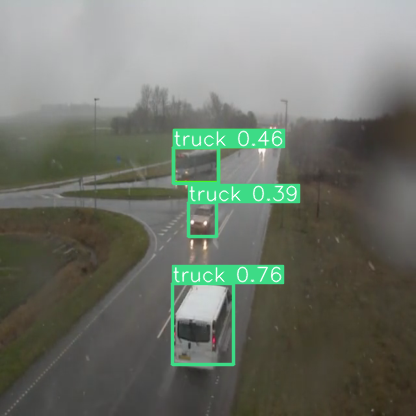

image 1/1: 416x416 1 bus, 3 trucks
Speed: 5.6ms pre-process, 415.0ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)


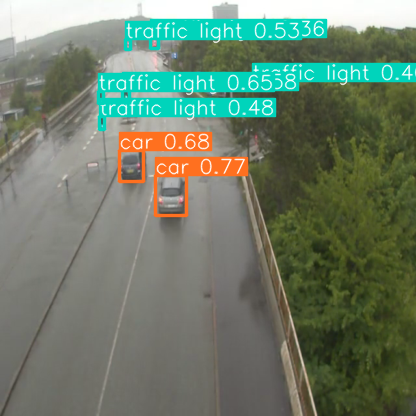

image 1/1: 416x416 2 cars, 6 traffic lights
Speed: 5.5ms pre-process, 458.7ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)


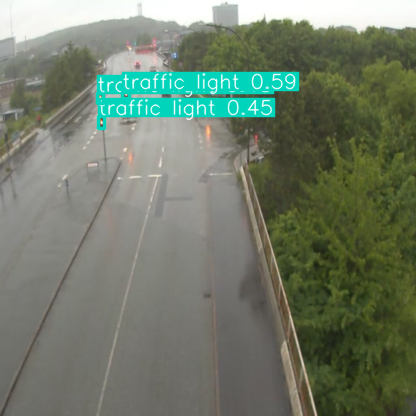

image 1/1: 416x416 3 traffic lights
Speed: 6.0ms pre-process, 657.6ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)


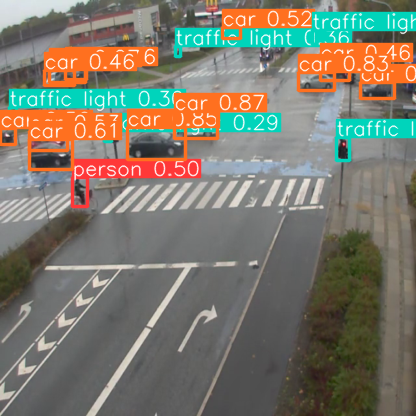

image 1/1: 416x416 1 person, 12 cars, 5 traffic lights
Speed: 8.2ms pre-process, 647.2ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)


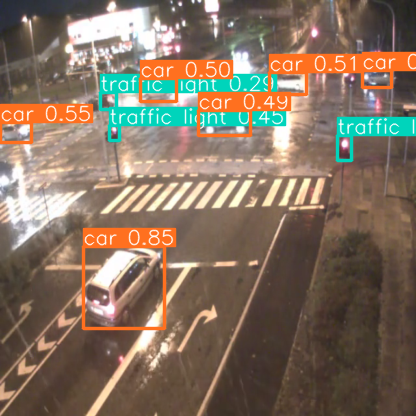

image 1/1: 416x416 6 cars, 3 traffic lights
Speed: 7.9ms pre-process, 650.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


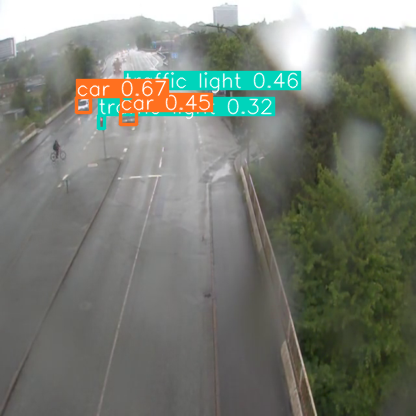

image 1/1: 416x416 2 cars, 2 traffic lights
Speed: 6.2ms pre-process, 617.6ms inference, 3.6ms NMS per image at shape (1, 3, 640, 640)


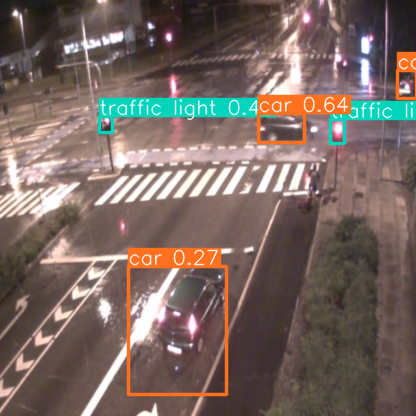

image 1/1: 416x416 3 cars, 2 traffic lights
Speed: 6.1ms pre-process, 456.7ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)


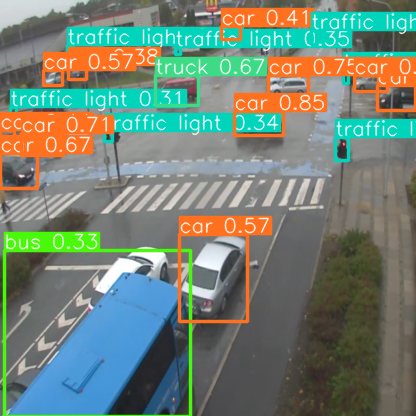

image 1/1: 416x416 11 cars, 1 bus, 1 truck, 7 traffic lights
Speed: 4.9ms pre-process, 426.3ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)


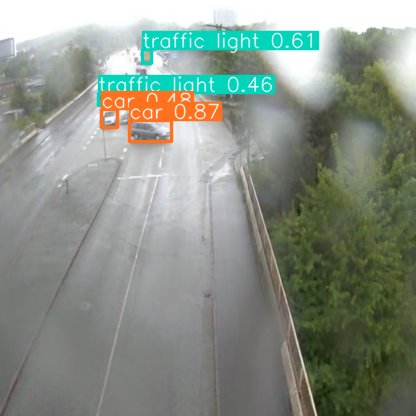

image 1/1: 416x416 2 cars, 2 traffic lights
Speed: 5.1ms pre-process, 417.0ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)


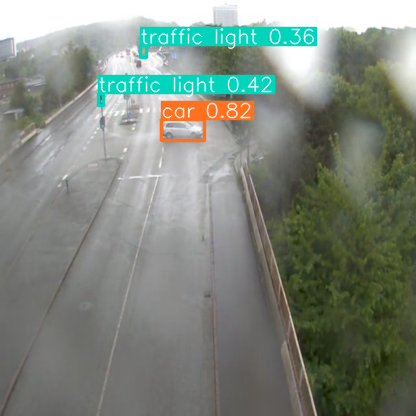

image 1/1: 416x416 1 car, 2 traffic lights
Speed: 5.0ms pre-process, 414.3ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)


Speed (seconds per image): 0.524524736404419


In [ ]:
# Set up the environment
!pip install torch torchvision
!pip install git+https://github.com/ultralytics/yolov5.git


# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

# Path to the directory containing the train images
dir = '/content/drive/MyDrive/Projekt prva godina/rain_dataset'

# Get the list of image files in the train directory
image_files = [os.path.join(dir, file) for file in os.listdir(dir) if file.endswith('.png')]

# Limit the number of images to process
num_images = 10
image_files = image_files[:num_images]

# Define the target size for resizing the images
target_size = (416, 416)

# Define the image transformation
transform = transforms.Resize(target_size)

# Variables for accuracy and recall
total_positives = 0
correct_positives = 0

# Loop over the image files and perform vehicle detection
total_time = 0.0
for image_file in image_files:
    # Load the image
    image = Image.open(image_file).convert('RGB')

    # Resize the image to the target size
    image = transform(image)

    # Perform vehicle detection on the resized image
    start_time = time.time()
    results = model([image])  # Pass the resized image as a list to the model
    end_time = time.time()
    execution_time = end_time - start_time
    total_time += execution_time

    # Filter the detected objects for vehicles
    class_labels = model.model.names
    vehicle_class_index = class_labels.index('car') if 'car' in class_labels else -1
    if vehicle_class_index != -1:
        vehicles = results.pred[0][results.pred[0][:, -1] == vehicle_class_index]
    else:
        vehicles = []

    # Process the detected vehicles
    if len(vehicles) > 0:
        for vehicle in vehicles:
            # Extract the bounding box coordinates
            x1, y1, x2, y2 = vehicle[:4].tolist()

            # Extract the confidence score
            confidence = vehicle[4].item()

            # Process the detected vehicle as per your project requirements
            # ...

            # Update accuracy and recall
            total_positives += 1
            correct_positives += 1
    else:
        # No vehicles detected, update total positives only
        total_positives += 1

    # Display the image with bounding boxes (optional)
    results.show()
    results.print()

# Calculate accuracy and recall
accuracy = correct_positives / total_positives if total_positives > 0 else 0
recall = correct_positives / total_positives if total_positives > 0 else 0

# Print speed

print("Speed (seconds per image):", total_time / len(image_files))

In [ ]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

# Path to the directory containing the train images
dir = '/content/drive/MyDrive/Projekt prva godina/rain_dataset'

# Get the list of image files in the train directory
image_files = [os.path.join(dir, file) for file in os.listdir(dir) if file.endswith('.png')]

# Limit the number of images to process
num_images = 10
image_files = image_files[:num_images]

# Define the target size for resizing the images
target_size = (416, 416)

# Define the image transformation
transform = transforms.Resize(target_size)

# Variables for tracking metrics
total_time = 0.0
total_objects = 0

# Loop over the image files and perform vehicle detection
for image_file in image_files:
    # Load the image
    image = Image.open(image_file).convert('RGB')

    # Resize the image to the target size
    image = transform(image)

    # Perform vehicle detection on the resized image
    start_time = time.time()
    results = model([image])  # Pass the resized image as a list to the model
    end_time = time.time()
    execution_time = end_time - start_time
    total_time += execution_time

    # Count the number of detected objects
    total_objects += len(results.pred[0])

    # Display the bounding boxes and class names
    results.print()

# Calculate metrics
num_images_processed = len(image_files)
fps = num_images_processed / total_time
avg_detection_time = total_time / num_images_processed
avg_objects_per_image = total_objects / num_images_processed

# Print the metrics
print("FPS:", fps)
print("Average Detection Time per Image:", avg_detection_time)
print("Average Number of Objects per Image:", avg_objects_per_image)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-22 Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 416x416 1 bus, 3 trucks
Speed: 5.5ms pre-process, 411.4ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 cars, 6 traffic lights
Speed: 4.5ms pre-process, 390.7ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 3 traffic lights
Speed: 5.2ms pre-process, 401.9ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 person, 12 cars, 5 traffic lights
Speed: 4.6ms pre-process, 396.0ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 6 cars, 3 traffic lights
Speed: 6.4ms pre-process, 389.9ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 cars, 2 traffic lights
Speed: 4.5ms pre-process, 404.1ms inference, 1.7ms NMS per i

FPS: 2.4367436635023054
Average Detection Time per Image: 0.4103837490081787
Average Number of Objects per Image: 7.8


<center>

##Faster R-CNN

</center>

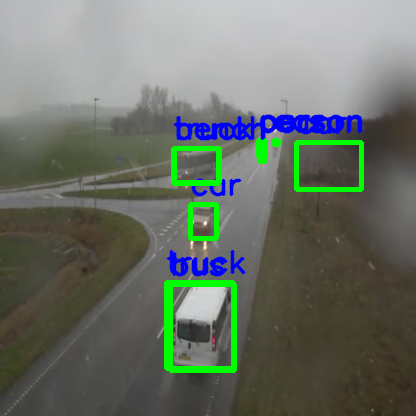

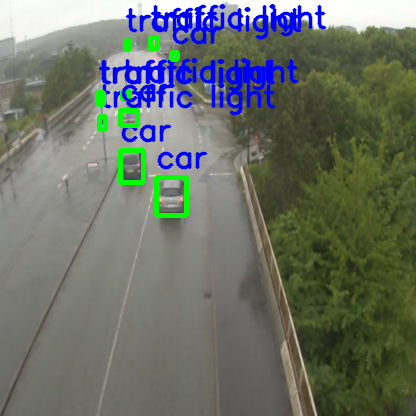

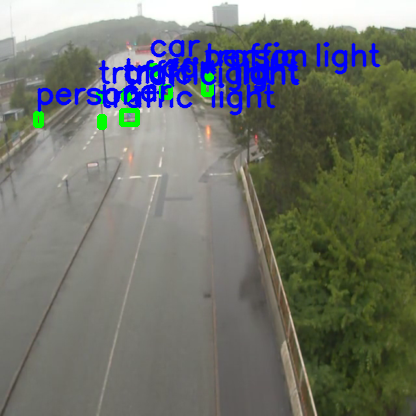

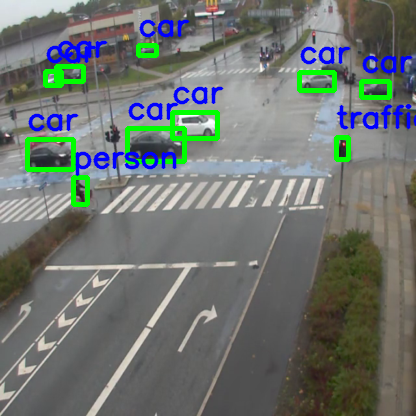

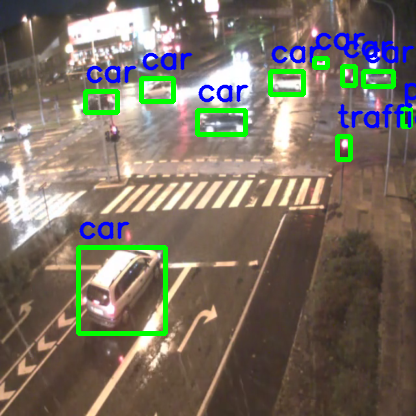

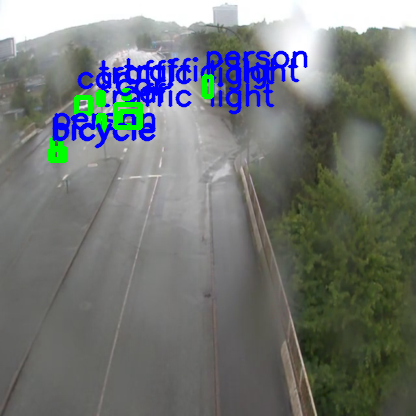

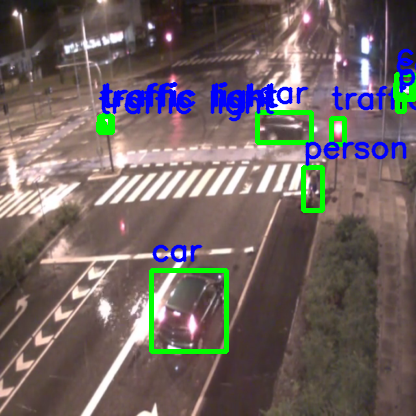

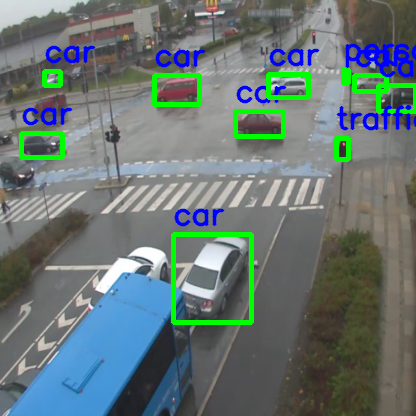

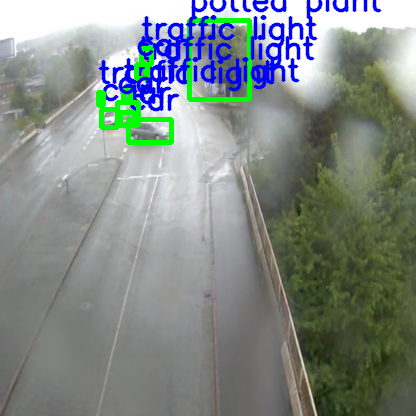

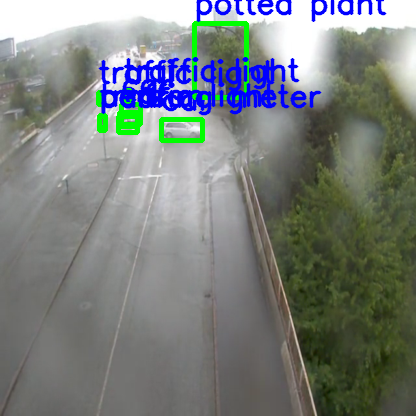

FPS: 0.15996352699290506
Average Time per Image: 6.251425051689148
Average Number of Objects per Image: 49.1


In [ ]:
# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Path to the directory containing the train images
dir = '/content/drive/MyDrive/Projekt prva godina/rain_dataset'

# Get the list of image files in the train directory
image_files = [f'{dir}/{file}' for file in os.listdir(dir) if file.endswith('.png')][:10]

# Define the image transformation
transform = T.Compose([
    T.Resize((416, 416)),  # Resize image to target size
    T.ToTensor()
])

# Ground truth labels
ground_truth_labels = ['car', 'truck', 'traffic light', 'person', 'bicycle', 'bus', 'motorcycle', 'stop sign', 'train', 'parking meter']

# Initialize lists for storing predictions and labels
all_predictions = []
all_labels = []

# Initialize variables for accuracy calculation
correct_predictions = 0
total_predictions = 0

# Initialize variables for counting objects
total_objects = 0

# Initialize variables for computational efficiency
total_time = 0.0
total_objects_detected = 0

# Iterate through the image files
for image_file in image_files:
    # Open the image
    img = Image.open(image_file)
    
    # Apply the transformation
    img_tensor = transform(img)
    
    # Perform object detection
    start_time = time.time()
    with torch.no_grad():
        pred = model([img_tensor])
    end_time = time.time()
    execution_time = end_time - start_time
    total_time += execution_time
    
    # Get the bounding boxes, labels, and scores
    bboxes, labels, scores = pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']
    num = torch.argwhere(scores > 0.80).shape[0]
    # Update the total number of objects
    total_objects += num
    total_objects_detected += len(bboxes)
    
    # Scale the pixel values from [0, 1] to [0, 255]
    img_tensor = img_tensor * 255
    
    # Convert the image tensor to numpy array for visualization
    img_np = img_tensor.permute(1, 2, 0).numpy().astype("uint8")
    img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    
    # Iterate through the detected objects
    predictions = []
    for i in range(min(10, len(bboxes))):
        x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
        class_name = classes[labels.numpy()[i]-1]
        
        # Draw bounding box and label on the image
        img_np = cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 3)
        img_np = cv2.putText(img_np, str(class_name), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        predictions.append(class_name)

        # Compare predicted label with ground truth label
        predicted_label = str(class_name)
        ground_truth_label = ground_truth_labels[i]

        if predicted_label == ground_truth_label:
            correct_predictions += 1

        total_predictions += 1

    # Add predictions and ground truth labels to the lists
    all_predictions.append(predictions)
    all_labels.append(ground_truth_labels)
    
    # Display the image with bounding boxes
    cv2_imshow(img_np)

# Flatten the lists
all_predictions_flat = [item for sublist in all_predictions for item in sublist]
all_labels_flat = [item for sublist in all_labels for item in sublist]

# Calculate the metrics
num_images = len(image_files)
fps = num_images / total_time
avg_time_per_image = total_time / num_images
avg_objects_per_image = total_objects_detected / num_images

# Print the metrics
print("FPS:", fps)
print("Average Time per Image:", avg_time_per_image)
print("Average Number of Objects per Image:", avg_objects_per_image)

<center>

#Zaključak

</center>

Razlika u broju objekata detektiranih od strane Faster R-CNN i YOLOv5 može se pripisati arhitektonskim razlikama i osnovnim algoritmima koje koriste ova dva modela.

Faster R-CNN je model detekcije objekata koji se sastoji od dvije faze. Prva faza je mreža za generiranje prijedloga regija (RPN) koja generira potencijalne lokacije okvira oko objekata. Druga faza je konvolucijska neuronska mreža (R-CNN) koja klasificira i poboljšava te prijedloge. Ovaj dvofazni proces omogućava Faster R-CNN-u precizno lociranje objekata, ali može rezultirati većim brojem detektiranih objekata, uključujući manje ili preklapajuće se objekte.

S druge strane, YOLOv5 je model detekcije objekata koji se odvija u jednoj fazi. Izravno predviđa okvire i vjerojatnosti klasa u jednom prolazu. Koristi sidrene okvire i mrežne ćelije kako bi podijelio sliku i napravio predikcije na različitim skalama. YOLOv5 je poznat po svojoj brzini i izvedbi u stvarnom vremenu, ali može imati nešto nižu točnost u usporedbi s dvofaznim modelima poput Faster R-CNN-a.

Razlika u broju detektiranih objekata može ovisiti o konkretnoj implementaciji, konfiguraciji modela i skupu podataka za obuku koji se koristi za svaki model. Važno je napomenuti da broj detektiranih objekata ne označava nužno ukupnu izvedbu ili točnost modela.

Faster R-CNN, zbog svog dvofaznog procesa koji uključuje generiranje prijedloga regija i klasifikaciju, može imati veću preciznost u lokalizaciji objekata čak i u slučajevima loše vidljivosti. Međutim, zbog složenijeg procesa, može se dogoditi da detektira više objekata, uključujući i lažno pozitivne detekcije, što može povećati ukupan broj objekata.

YOLOv5, s druge strane, može se suočiti s izazovima u slučajevima loše vidljivosti zbog svoje jednofazne arhitekture. Budući da direktno predviđa okvire i klase objekata, može biti manje osjetljiv na sitne detalje i slab kontrast između objekata i pozadine. To može rezultirati nižom stopom detekcije objekata i većim brojem lažno negativnih detekcija